In [239]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1=finesse.kat()
kat.verbose=True

In [240]:
kat.parse("""


l laser 10 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  

mod sb1 55.5556M 0.3 3 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 refl                     #space b/w mod and PRM      ---> REFL <---

m PRM 0.8599 0.1 90 refl pop               #PRM                ---> POP <---
#m PRM 0 1 90 refl pop               #PRM
s PRC 1.35 pop b3                        #PRC 
m ITM 0.98997 0.01 0 b3 n12              #ITM
s ARM 3.3 n12 b5                        #ARM length 3.3
m ETM 0.99996 0.00001 0 b5 b6           #ETM
#m ETM 0 1 0 b5 b6 

cav PRCL PRM pop ITM b3
cav ARML ITM n12 ETM b5 
trace 2 

attr ETM Rc 11.3 
attr PRM Rc -23.6

attr PRM xbeta 0
attr ETM xbeta 0         
attr ITM xbeta 0 


set err pop re
lock clock $err 2 100n 
put* ETM phi $clock


set err1 refl1 re
lock clock1 $err1 2 100n 
put* PRM phi $clock1


pd circ_arm b5
pd circ_prc pop
pd refl refl

pd1 pop 55.5556M 70 refl
pd1 refl1 166.6668M 50 refl


xaxis ITM phi lin 0 10 700

maxtem 3

""")

Parsing `set err pop re` into pykat object not implemented yet, added as extra line.
Parsing `set err1 refl1 re` into pykat object not implemented yet, added as extra line.


In [241]:
out = kat.run()
out.info()
#out.plot()

--------------------------------------------------------------
Running kat - Started at 2022-09-28 12:29:22.298708


100% | ETA:  0:00:00 | Calculating - Locked XX (Locking steps tried 289/10000) 

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 283.655 seconds

--- Output info ---

Run date and time: 2022-09-28 12:29:22.298707
Detectors used: circ_arm, circ_prc, clock, clock1, pop, refl, refl1

One xaxis used: ['xaxis ITM phi lin 0 10 700']
circ_arm : min = 5.119352193043390e+04 max = 5.119352228012550e+04
circ_prc : min = 1.387737918223520e+02 max = 1.387737927378860e+02
refl     : min = 5.897158169733629e-01 max = 5.897158772165750e-01
pop      : min = -8.777036956833600e-08 max = 6.298161315116930e-08
refl1    : min = -9.969257227875960e-08 max = 9.958723489683760e-08
clock    : min = -8.254748033820960e-05 max = 9.999917470808571e+00
clock1   : min = -3.072389358782470e-04 max = 9.999682731875360e+00


100% | ETA:  0:00:00 | Calculating - Locked ✓X (Locking steps tried 495/10000) 

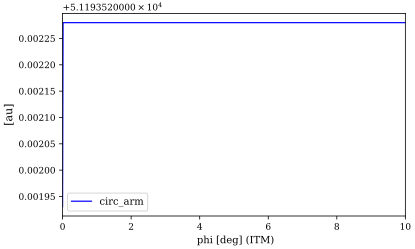

In [242]:
out.plot(['circ_arm'])

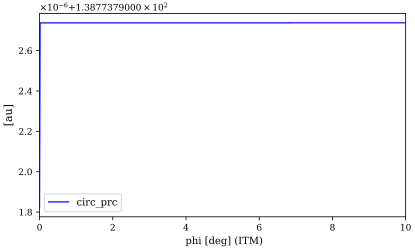

In [243]:
out.plot(['circ_prc'])

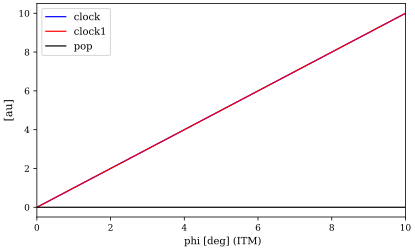

In [244]:
out.plot(['clock','pop','clock1'])

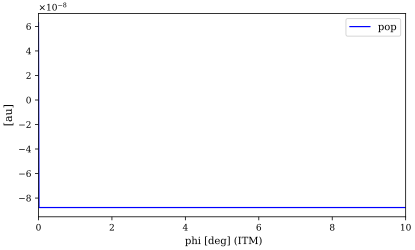

In [245]:
out.plot(['pop'])
#print("slope",(out['pop'][3001])/((out.x[3001])))

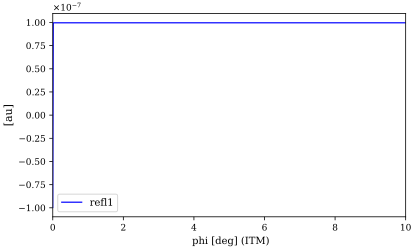

In [246]:
out.plot(['refl1'])
#print("slope",(out['refl1'][3001])/((out.x[3001])))

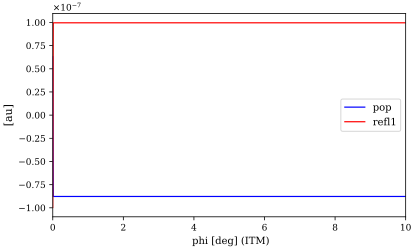

In [247]:
out.plot(['refl1','pop'])